# Lab 11-1 cnn_basics

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices()

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


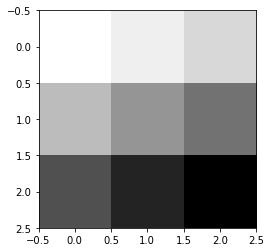

In [5]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

### 1 filter (2,2,1,1) with padding: VALID

weight.shape = 1 filter (2 , 2 , 1, 1)

<img width="1060" alt="스크린샷 2022-08-18 오전 8 06 06" src="https://user-images.githubusercontent.com/91893721/185258897-8f25f9d0-c75d-4a03-bb53-fbb0930b8ccd.png">

image.shape (1, 3, 3, 1)
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
변경 전 :  tf.Tensor(
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]], shape=(1, 2, 2, 1), dtype=float32)
변경 후 :  [[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
[[12. 16.]
 [24. 28.]]


2022-08-26 16:15:20.165669: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-26 16:15:20.165812: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


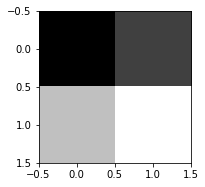

In [6]:
# print("imag:\n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')

# conv2d.eval() -> conv2d 수정
conv2d_img = conv2d
print("conv2d_img.shape", conv2d_img.shape)

print("변경 전 : ", conv2d_img)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("변경 후 : ", conv2d_img)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1)
    plt.imshow(one_img.reshape(2,2), cmap='gray')

### 1 filter (2,2,1,1) with padding:SAME


<img width="1044" alt="스크린샷 2022-08-18 오전 8 07 36" src="https://user-images.githubusercontent.com/91893721/185259011-b849337c-186f-4421-9c07-e00aacbb336c.png">

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


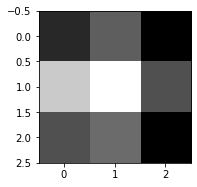

In [7]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')

conv2d_img = conv2d
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

### 3 filters (2,2,1,3)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


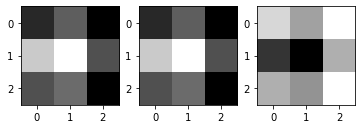

In [8]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')

conv2d_img = conv2d
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

### MAX POOLING


<img width="1034" alt="스크린샷 2022-08-18 오전 8 09 01" src="https://user-images.githubusercontent.com/91893721/185259146-dca50751-3c8c-4252-96ec-cfc7b8016b75.png">

<img width="1071" alt="스크린샷 2022-08-18 오전 8 09 26" src="https://user-images.githubusercontent.com/91893721/185259190-769523ac-1dd8-4c70-9627-2efdedef9a0f.png">

In [9]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
tf.print(pool)

(1, 1, 1, 1)
[[[[4]]]]


### SAME: Zero paddings

<img width="1056" alt="스크린샷 2022-08-18 오전 8 10 08" src="https://user-images.githubusercontent.com/91893721/185259284-45b66582-3886-4565-ba19-5503cc02fce8.png">


In [10]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
tf.print(pool)

(1, 2, 2, 1)
[[[[4]
   [3]]

  [[2]
   [1]]]]


In [11]:
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# # Check out https://www.tensorflow.org/get_started/mnist/beginners for
# # more information about the mnist dataset


# img = mnist.train.images[0].reshape(28,28)
# plt.imshow(img, cmap='gray')



# sess = tf.InteractiveSession()

# img = img.reshape(-1,28,28,1)
# W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
# conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
# print(conv2d)
# sess.run(tf.global_variables_initializer())
# conv2d_img = conv2d.eval()
# conv2d_img = np.swapaxes(conv2d_img, 0, 3)
# for i, one_img in enumerate(conv2d_img):
#     plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')




# pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
#                         1, 2, 2, 1], padding='SAME')
# print(pool)
# sess.run(tf.global_variables_initializer())
# pool_img = pool.eval()
# pool_img = np.swapaxes(pool_img, 0, 3)
# for i, one_img in enumerate(pool_img):
#     plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

In [12]:
# Lab 11 MNIST and Convolutional Neural Network
import numpy as np
import tensorflow as tf
import random

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test / 255
x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# one hot encode y data
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# hyper parameters
learning_rate = 0.001
training_epochs = 12
batch_size = 128

tf.model = tf.keras.Sequential()
# L1
tf.model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L2
tf.model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L3 fully connected
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax'))

tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 10)                8

/Users/mindongjun/miniconda3/envs/tf2/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/12


2022-08-26 16:15:21.485748: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-26 16:15:21.690609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 7s 13ms/step - loss: 0.3746 - accuracy: 0.8987
Epoch 2/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0951 - accuracy: 0.9717
Epoch 3/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0711 - accuracy: 0.9789
Epoch 4/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0578 - accuracy: 0.9826
Epoch 5/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0491 - accuracy: 0.9855
Epoch 6/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0433 - accuracy: 0.9866
Epoch 7/12
469/469 [==============================] - 6s 14ms/step - loss: 0.0385 - accuracy: 0.9885
Epoch 8/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0339 - accuracy: 0.9898
Epoch 9/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0314 - accuracy: 0.9903
Epoch 10/12
469/469 [==============================] - 6s 13ms/step - loss: 0.0283 - accuracy: 0.9912


2022-08-26 16:16:35.291106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
index:  4123 actual y:  8 predicted y:  8
index:  7175 actual y:  0 predicted y:  0
index:  264 actual y:  9 predicted y:  9
index:  1159 actual y:  4 predicted y:  4
index:  7424 actual y:  1 predicted y:  1
index:  575 actual y:  9 predicted y:  9
index:  3052 actual y:  0 predicted y:  0
index:  5874 actual y:  5 predicted y:  5
index:  1858 actual y:  6 predicted y:  6
index:  1694 actual y:  8 predicted y:  8
 19/313 [>.............................] - ETA: 1s - loss: 0.0406 - accuracy: 0.9868

2022-08-26 16:16:36.076048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.0373 - accuracy: 0.9881
loss:  0.03729947283864021
accuracy 0.9881000518798828
